In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


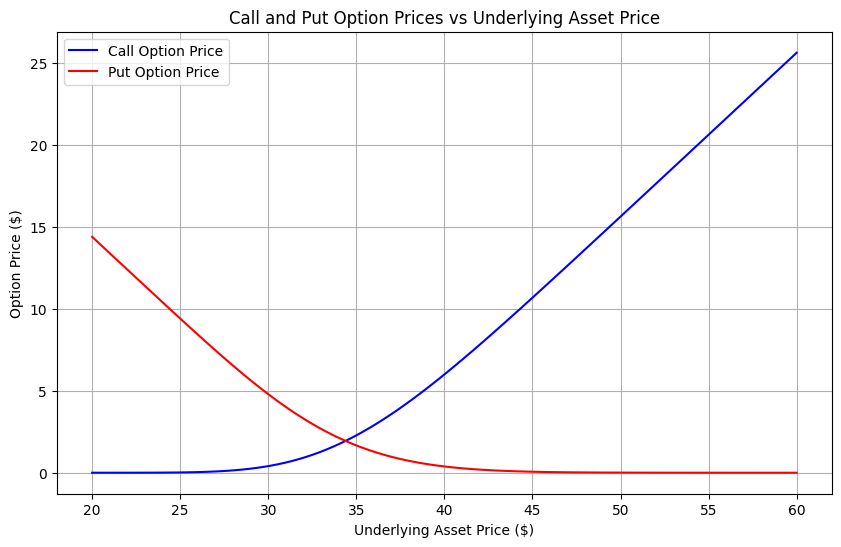

In [ ]:
# Option parameters
K = 42  # Strike Price
T = 2   # Time to Expiration
r = 0.1 # Risk-Free Rate
vol = 0.1 # Volatility (σ)

def calculate_d1_d2(S, K, T, r, vol):
    d1 = (math.log(S/K) + (r + 0.5 * vol**2)*T) / (vol * math.sqrt(T))
    d2 = d1 - (vol * math.sqrt(T))
    return d1, d2


def calculate_option_prices(S, K, T, r, vol):
    d1, d2 = calculate_d1_d2(S, K, T, r, vol)
    C = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)  
    P = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)  
    return C, P

S_values = np.linspace(20, 60, 100) 

call_prices = []
put_prices = []

for S in S_values:
    C, P = calculate_option_prices(S, K, T, r, vol)
    call_prices.append(C)
    put_prices.append(P)

plt.figure(figsize=(10, 6))
plt.plot(S_values, call_prices, label='Call Option Price', color='blue')
plt.plot(S_values, put_prices, label='Put Option Price', color='red')
plt.title('Call and Put Option Prices vs Underlying Asset Price')
plt.xlabel('Underlying Asset Price ($)')
plt.ylabel('Option Price ($)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

